In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [4]:
df = pd.read_csv("C:\\Users\\sw\\Desktop\\Data Analysis Project Portfolio\\Customer Data Analysis - Python\\SalesAnalysis\\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#Merging the data files for all the months into a csv file
path = "C:\\Users\\sw\\Desktop\\Data Analysis Project Portfolio\\Customer Data Analysis - Python\\SalesAnalysis\\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
#Cleaning the Data
#Dropping NaN rows
all_months_data = all_months_data.dropna()

In [7]:
#Dropping rows with the Order data missing [ Order Date = 'Or' ]
all_months_data= all_months_data[all_months_data['Order Date'].str[0:2] !='Or']

In [8]:
#Converting Quantity ordered and Price Each to int from string
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

In [9]:
#adding additional columns
#1.Month
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data['Month'] = all_months_data['Month'].astype('int32')

In [10]:
#2.Sales
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
#3.City and state combined row
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x : x.split(',')[1]) + ' (' + all_months_data['Purchase Address'].apply(lambda x : x.split(',')[2].split(' ')[1]) + ')'
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [12]:
#Best Month for Sales
results1 = all_months_data.groupby('Month').sum()
#So december was the best month for sales, and jan was the worst
results1


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


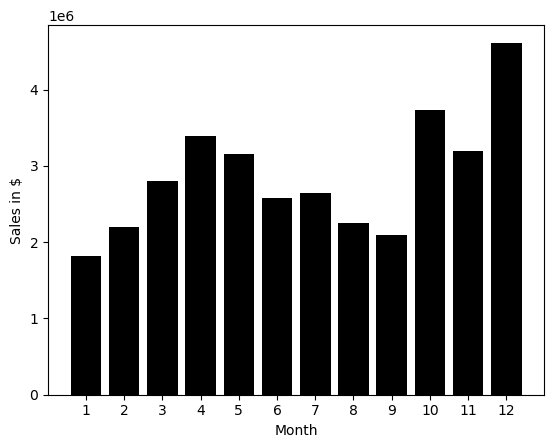

In [13]:
#Plotting
months = range(1,13)
plt.bar(months,results1['Sales'], color = 'Black')
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month')
plt.show()

In [14]:
#City with highest Sales
results2 = all_months_data.groupby('City').sum()
results2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


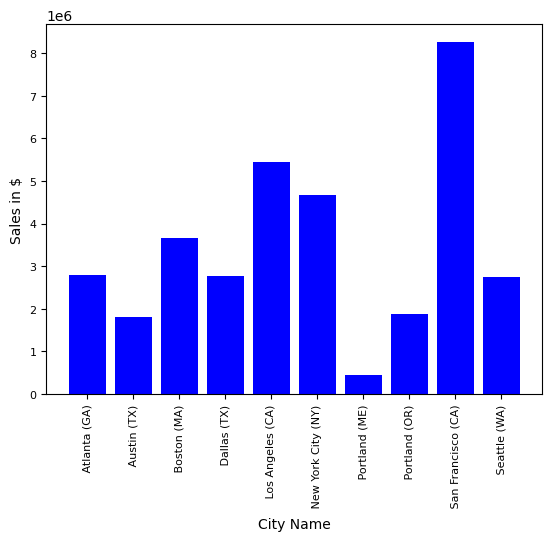

In [60]:
#Plotting
cities = [city for city, df in all_months_data.groupby('City')]
plt.bar(cities,results2['Sales'], color = 'Blue')
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.yticks(size = 8)
plt.ylabel('Sales in $')
plt.xlabel('City Name')
plt.show()

In [18]:
#time we should display the ads to maximise the sales
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


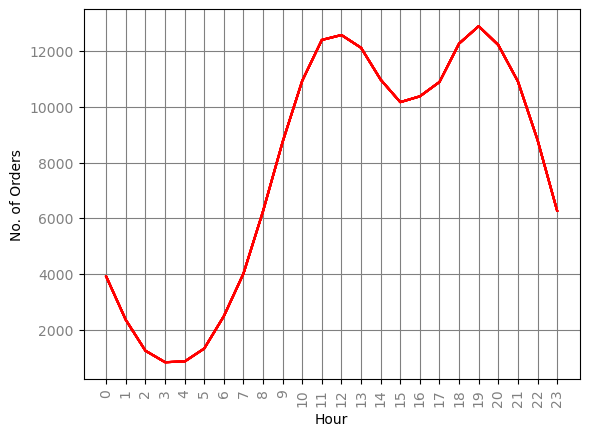

In [30]:
#plotting

hours = [hour for hour, df in all_months_data.groupby('Hour')]
plt.plot(hours, all_months_data.groupby(['Hour']).count(), color = 'red')
plt.xticks(hours, rotation = 'vertical', color = 'gray')
plt.yticks(color = 'gray')
plt.grid(color = 'gray')
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.show()

#Recommended time for advertising : 11am/7pm


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,MA
23,176578,Apple Airpods Headphones,1,150.00,04/09/19 23:35,"513 Church St, Boston, MA 02215",4,150.00,Boston,MA
26,176581,iPhone,1,700.00,04/09/19 21:38,"84 Jackson St, Boston, MA 02215",4,700.00,Boston,MA
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA
...,...,...,...,...,...,...,...,...,...,...
11663,259336,AAA Batteries (4-pack),3,2.99,09/25/19 00:13,"753 14th St, Boston, MA 02215",9,8.97,Boston,MA
11664,259337,USB-C Charging Cable,1,11.95,09/19/19 17:34,"495 Park St, Boston, MA 02215",9,11.95,Boston,MA
11665,259338,AAA Batteries (4-pack),2,2.99,09/02/19 21:29,"666 Lakeview St, Boston, MA 02215",9,5.98,Boston,MA
11669,259342,AA Batteries (4-pack),1,3.84,09/07/19 20:09,"579 South St, Boston, MA 02215",9,3.84,Boston,MA


In [50]:
#Products sold together most often 
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)]
df.head(20)

df['Grouped Orders'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df.head()

#Deleting Duplicate Records

df = df[['Order ID', 'Grouped Orders']].drop_duplicates()

df.head()

count = Counter()


from itertools import combinations
from collections import Counter 
for row in df['Grouped Orders']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\sw\AppData\Local\Temp\ipykernel_18988\45119191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Orders'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


Text(0.5, 0, 'Product')

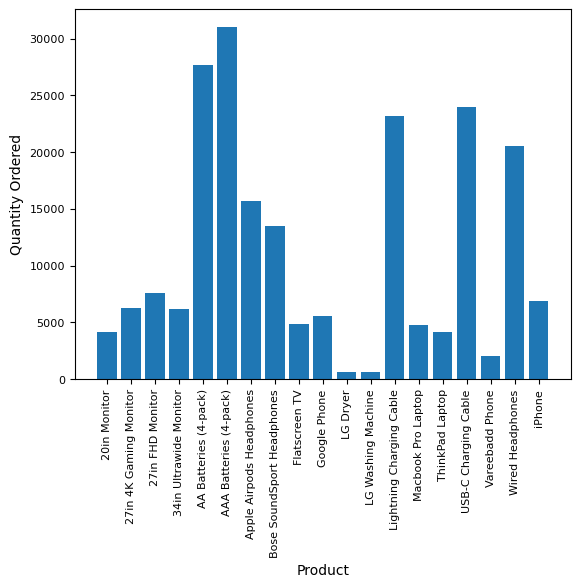

In [77]:
#What product Sold the most?
product_group = all_months_data.groupby('Product')
product_group.sum()
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.yticks(size = 8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')


C:\Users\sw\AppData\Local\Temp\ipykernel_18988\1000980758.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation  = 'vertical', size = 8)


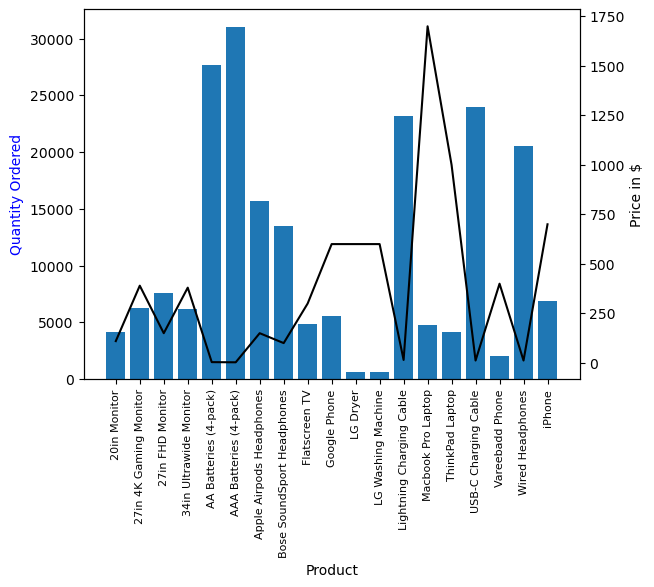

In [76]:
#overlaying the graph with another axis(Price)

prices = all_months_data.groupby('Product').mean()['Price Each']
#print(prices)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products, prices, color = 'black' )
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'blue')
ax2.set_ylabel('Price in $')
ax1.set_xticklabels(products, rotation  = 'vertical', size = 8)
#ax1.set_yticklabels(quantity_ordered, size = '8')
plt.show()

#For objects with higher price, quantity ordered is less